<div style="float:left">
            <h1 style="width:450px">CASA0007 Practical 6: Clustering Analysis</h1>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

Welcome!

In this practical, we will apply kmeans clustering analysis to different datasets.

The objectives of this practical include:
- Conducting kmeans clustering using *sklearn*;
- Plotting the clustering results;
- Using Siluette analysis to get the *optimal number of clusters*.

## Import packages

In [1]:
# The following lines import the necessary packages
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

from sklearn.preprocessing import RobustScaler
import sklearn


In [2]:

sklearn.__version__

'1.1.1'

## Import data

The input data for the kmeans clustering is a dataframe, with rows and columns representing data records and attributes (or variables), respectively.

The clustering works for data with many fields. For illustration, we will use a very simple data example containing only two columns.

In [3]:
# This line sets the number of clusters you want to find:
num_clusters = 2

file_data_simple = 'https://github.com/huanfachen/QM_2021/raw/main/data/clustering_example_data_simple.csv'
data = pd.read_csv(file_data_simple, header=None)
# header=None means that there is no header int this file
data.columns = ['Var_0', 'Var_1']
#You can print it to have a look if you want:
print(data)

   Var_0  Var_1
0   10.4   13.0
1   11.6   11.4
2    5.6   10.7
3    6.8   13.0
4   11.5   10.5
5    5.8    9.4
6    9.9   10.8


Text(0.5, 1.0, 'Scatter plot of simple data')

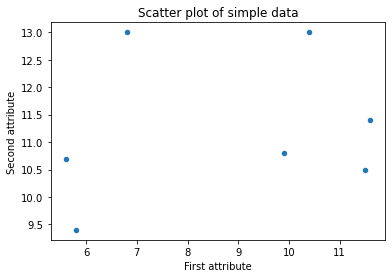

In [4]:
# a scatter plot of this data
ax = data.plot.scatter(x = 'Var_0', y = 'Var_1')
ax.set_xlabel("First attribute")
ax.set_ylabel("Second attribute")
ax.set_title("Scatter plot of simple data")

# Data standardisation

We need to standardise the variables before clustering so that the variables are comparable and of the same scale.

We will use the ```MinMaxScaler``` class (see [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)) from the ```sklearn``` package for standardising the dataset.

One note on `scikit-learn`: most `scikit-learn` methods operate in a very similar fashion. It uses the `.fit()` or `.fit_transform()` function execute the model and return results.

In [5]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

data_standardised = data.copy()
for c in data.columns.values:
    data_standardised[c] = mms.fit_transform(data[c].values.reshape(-1,1))
data_standardised.head()

,Var_0,Var_1
0,0.800000,1.000000
1,1.000000,0.555556
2,0.000000,0.361111
3,0.200000,1.000000
4,0.983333,0.305556


## Kmeans clustering

We will use the KMeans function from sklearn to conduct the clustering analysis. This is the the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

There are many parameters of kmeans. Two of the most important parameters are :

- **n_clusters**: specify the number of clusters that will form.
- **random_state**: Determines random number generation for centroid initialization. For complex data, if you want to make the kmeans result reproducible, it is advisable to fix the random_state parameter.

In [6]:
# we fix the random_state so that the kmeans result is reproducible
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters=num_clusters, random_state=random_state_seed).fit(data_standardised)

# Sanity check
print(kmeans_output)                                                

KMeans(n_clusters=2, random_state=100)


In [7]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# You can print the clustering IDs to get an ordered list of labels
print(clustering_ids_kmeans)

[1 1 0 0 1 0 1]


In [8]:
# we will combine the clustering IDs to the dataframe

data = data.assign(cluster_id = clustering_ids_kmeans)

#Have a look at the result:
print(data)

   Var_0  Var_1  cluster_id
0   10.4   13.0           1
1   11.6   11.4           1
2    5.6   10.7           0
3    6.8   13.0           0
4   11.5   10.5           1
5    5.8    9.4           0
6    9.9   10.8           1


Now we will visualise the clusters using different colours on the scatter plot.

We will use an existing colour map from the *get_cmp* function.

If you want to know more about Choosing Colormaps in Matplotlib, [this post](https://matplotlib.org/stable/tutorials/colors/colormaps.html) is recommended.

The code below is motivated by [this OverStackFlow post](https://stackoverflow.com/a/50314773/4667568).

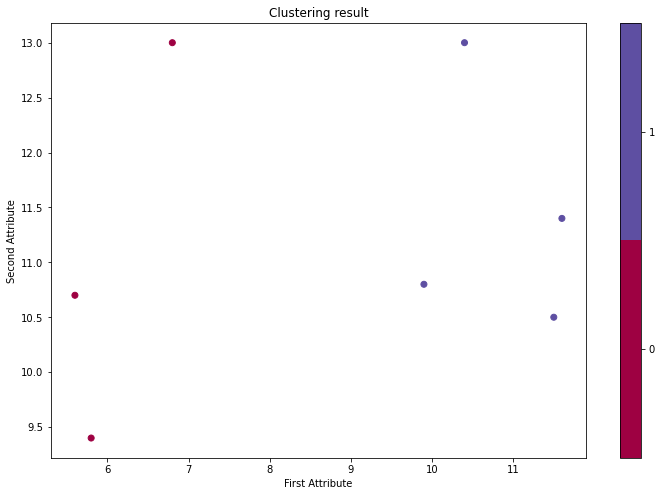

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

# number of clusters
n_clusters = data.cluster_id.nunique()

# get discrete colormap
cmap = plt.get_cmap('Spectral', n_clusters)

# scatter points
scatter = ax.scatter(data.Var_0, data.Var_1, c=data.cluster_id, cmap=cmap)
ax.set_xlabel('First Attribute')
ax.set_ylabel('Second Attribute')
ax.set_title('Clustering result')

# add colorbar
cbar = plt.colorbar(scatter)

# set ticks locations (not very elegant, but it works):
# - shift by 0.5
# - scale so that the last value is at the center of the last color
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

# set tick labels (as before)
cbar.set_ticklabels(np.arange(n_clusters))

The result above looks a bit simple: we generated two clusters from seven data records.

Keep in mind - once you master the techinques and codes of kmeans, you can easily apply these skills to a complex dataset.

But, before we switch to a complex data, we will do something advanced: calculate the Silouette score of kmeans and choose the optimal **k**.

## Silouette score

Silouette score is a measure of how well the data is clustered, from -1 (extremely poor) to 1 (extremely strong).

Given the clustering result, we can use the silhouette_score function from sklearn.metrics to calculate the Silouette score.

In [10]:
# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(data_standardised,clustering_ids_kmeans)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.40859382546379586


In addition, we can compare the Silhouette score for the clusters generated from different k values and selecting the optimal **k**.

We will use some of the functions from [this post](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Here, we simplify the Silhouette analysis by only looking at the average Silhouette score: the larger the average Silhouette score, the better the clustering result.

[Optional] If you are interested, you can have a look at other function from the post provided (e.g. Silhouette plot of each n_cluster).

In [11]:
X = data_standardised[['Var_0', 'Var_1']]
random_state_seed = 10
df_silhouette_score = pd.DataFrame({'n_cluster':[2,3,4], 'silhouette_score':[0,0,0]})
for index, row in df_silhouette_score.iterrows():
    n_clusters = row['n_cluster']
    clusterer = sklc.KMeans(n_clusters=n_clusters, random_state=random_state_seed).fit(X)
    cluster_labels = clusterer.labels_
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sklm.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    row['silhouette_score'] = silhouette_avg

For n_clusters = 2 The average silhouette_score is : 0.40859382546379586
For n_clusters = 3 The average silhouette_score is : 0.4790531273951038
For n_clusters = 4 The average silhouette_score is : 0.3752656812764138


When k=3, the clusters generate the highest average Silhouette score, so we will choose k=3 for the kmeans analysis of this dataset. 

## Conclusions

We have applied the kmean clustering to a very simple dataset, as well as plotting the clusters on a scatter plot and using Silhouette analysis to select the optimal **k** value.

This is optional - now, can you try these techniques to other datasets and describe/validate the generated clusters?

- [The London Index of Multiple Deprivation 2019 dataset](https://github.com/huanfachen/QM_2021/raw/main/data/IMD_2019_for_London.csv): this dataset contains the following six sub-domains of deprivaition of LSOAs in London (see [the source](https://data.london.gov.uk/dataset/indices-of-deprivation)). Can you use some of these variables to get the clusters of the deprivation in London? 
    - Children and Young People Sub-domain Score
    - Adult Skills Sub-domain Score
    - Geographical Barriers Sub-domain Score
    - Wider Barriers Sub-domain Score
    - Indoors Sub-domain Score
    - Outdoors Sub-domain Score

In addition, you can visualise these clusters on a map and inspect the spatial distribution of these clusters - are they spatially clustered?

- Other datasets that you think are interesting and suitable for clustering analysis

## Credits
### Contributors:
The following individuals have contributed to these teaching materials: [Huanfa Chen](huanfa.chen@ucl.ac.uk), Thomas Evans.
 

### License
These teaching materials are licensed under a mix of The MIT License and the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 license.

### Acknowledgements
NA

### Dependencies
This notebook depends on the following libraries: sklearn, matplotlib, numpy, pandas